In [51]:
#| hide
%load_ext autoreload
%autoreload 2

from discontinuitypy.datasets import IDsDataset
from datetime import timedelta
from utils import load_events

In [41]:
mission = "JNO"
ts = timedelta(seconds=1)
tau = timedelta(seconds=60)


data_dir = '../data'
dir_path = f'{data_dir}/03_primary/JNO_MAG_ts_{ts.seconds}s'
juno_state_path = f'{data_dir}/03_primary/JNO_STATE_ts_3600s.parquet'
vec_cols = ['v_x', 'v_y', 'v_z']

plasma_data = pl.scan_parquet(juno_state_path).sort('time')


In [42]:
ids_ds = IDsDataset(
    plasma_data=plasma_data,
    tau=tau,
    ts=ts,
    vec_cols=vec_cols,
    density_col="plasma_density",
    speed_col="plasma_speed",
    temperature_col="plasma_temperature",
)

In [44]:
jno_df_8hz_tau_20 = load_events('JNO', 0.125, 20, 'derivative')
ids_ds.events = jno_df_8hz_tau_20.filter(pl.col('len')==160, pl.col('time')<pl.datetime(2012,1,1), pl.col('index_d_diff')>1)

In [45]:
ids_ds.events.columns

['time',
 'tstart',
 'tstop',
 't.d_end',
 't.d_start',
 't.d_time',
 'index_diff',
 'len',
 'std',
 'std_prev',
 'std_next',
 'index_std',
 'index_fluctuation',
 'd_star',
 'B.after',
 'B.before',
 'b_mag',
 'b_n',
 'bn_over_b',
 'db_mag',
 'db_over_b',
 'db_over_b_max',
 'rotation_angle',
 'dB_x',
 'dB_y',
 'dB_z',
 'dB_lmn_x',
 'dB_lmn_y',
 'dB_lmn_z',
 'k_x',
 'k_y',
 'k_z',
 'Vl_x',
 'Vl_y',
 'Vl_z',
 'Vn_x',
 'Vn_y',
 'Vn_z',
 'duration',
 'radial_distance',
 'plasma_density',
 'plasma_temperature',
 'model_b_r',
 'model_b_t',
 'model_b_n',
 'v_x',
 'v_y',
 'v_z',
 'plasma_speed',
 'B_background_x',
 'B_background_y',
 'B_background_z',
 'v_x_before',
 'v_y_before',
 'v_z_before',
 'n.before',
 'v.ion.before',
 'T.before',
 'v_x_after',
 'v_y_after',
 'v_z_after',
 'n.after',
 'v.ion.after',
 'T.after',
 'v_l',
 'v_n',
 'v_k',
 'v_mn',
 'L_k',
 'j0_k',
 'ion_inertial_length',
 'Alfven_speed',
 'j_Alfven',
 'L_k_norm',
 'j0_k_norm',
 'v.ion.before.l',
 'v.ion.after.l',
 'B.vec.bef

In [46]:
from space_analysis.missions.juno.fgm import download_data

mag_paths = list(download_data(datatype="FULL"))

ids_ds.data = pl.scan_ipc(mag_paths[:200]).set_sorted('time')

2024-02-18 21:47:41.087 | INFO     | discontinuitypy.datasets:plot_candidates:215 - Candidates indices: [196 115 457 349]


[(<Figure size 1200x500 with 1 Axes>, <Axes: ylabel='$B$\n[nT LMN]'>),
 (<Figure size 1200x500 with 1 Axes>, <Axes: ylabel='$B$\n[nT LMN]'>),
 (<Figure size 1200x500 with 1 Axes>, <Axes: ylabel='$B$\n[nT LMN]'>),
 (<Figure size 1200x500 with 1 Axes>, <Axes: ylabel='$B$\n[nT LMN]'>)]

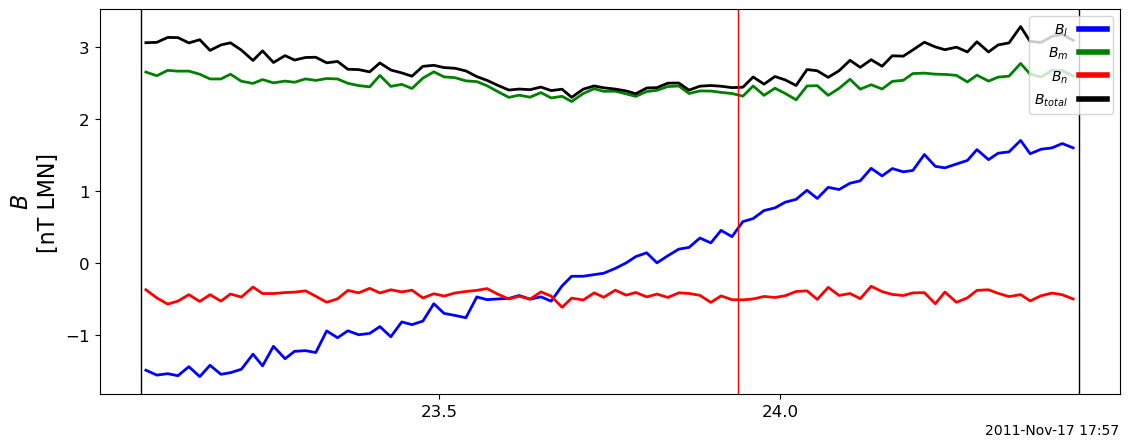

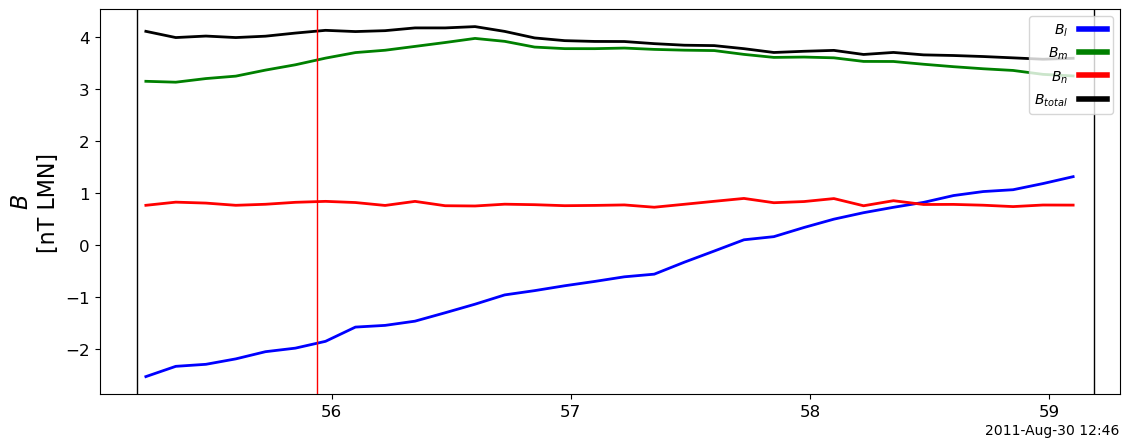

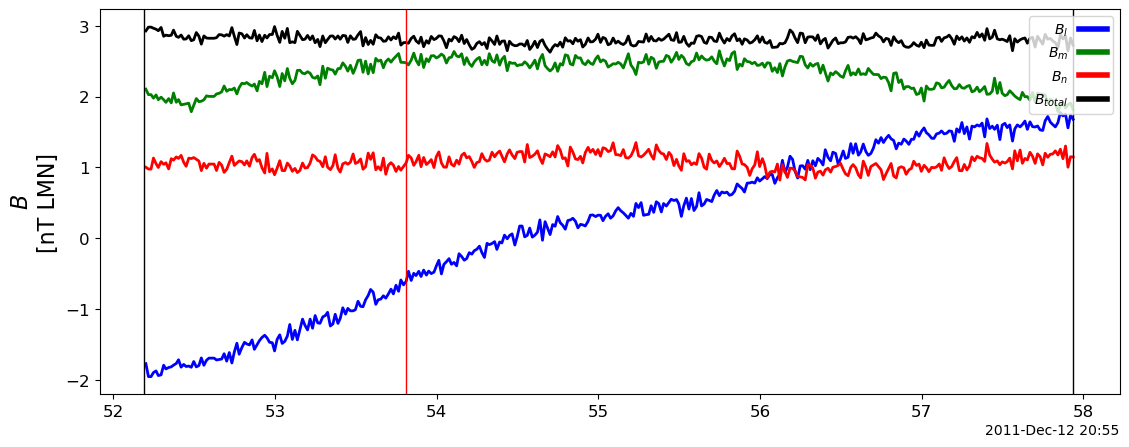

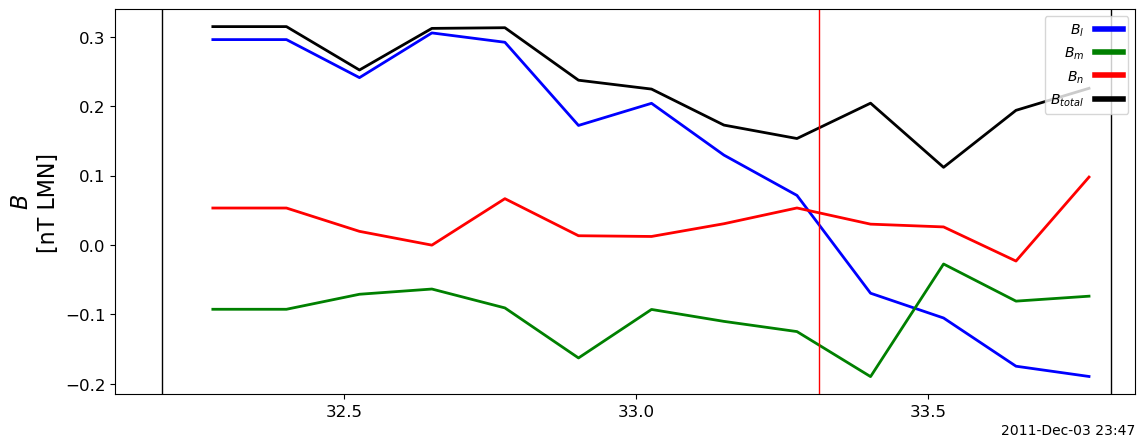

In [48]:
ids_ds.plot_candidates()